In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
df_clean=pd.read_csv("cleaned_sample_data.csv", encoding="utf-8")
df_shuffle=pd.read_csv("shuffled_sample_data.csv", encoding="utf-8")
df_sample=pd.read_csv("sample_data.csv", encoding="utf-8")

pd.set_option('mode.chained_assignment', None)

In [3]:
df_sample.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'body', 'writer', 'category',
       'send_date', 'send_time', 'image_title1', 'image_description1',
       'image_caption1', 'image_title2', 'image_description2',
       'image_caption2', 'image_title3', 'image_description3',
       'image_caption3'],
      dtype='object')

### sample데이터에서 title, body, category 가져오기(df)

In [4]:
df=pd.DataFrame(df_sample[['title','body','category']])
df

,title,body,category
0,한국인 평균 연령 지난해 42.1세…10년새 다섯 살 늙어,한국인 평균 연령 지난해 42.1세…10년새 다섯 살 늙어\n여성 인구 늘어 성비 ...,3
1,설 맞아 고속도로 휴게소 등 공중화장실 불법카메라 점검,설 맞아 고속도로 휴게소 등 공중화장실 불법카메라 점검\n\n<YNAOBJECT i...,3
2,'유혈분쟁' 북아일랜드서 차량 폭탄…브렉시트 국면 긴장고조,'유혈분쟁' 북아일랜드서 차량 폭탄…브렉시트 국면 긴장고조 \n법원 앞에서 터져…경...,6
3,[연합시론] 국민연금 주주권 행사 판단 중심은 '장기 수익성'이다,[연합시론] 국민연금 주주권 행사 판단 중심은 '장기 수익성'이다 \n\n ...,2
4,달리는 119구급차서 출산…대원들이 산파 역할,"달리는 119구급차서 출산…대원들이 산파 역할\n30대 임신부, 집에서 병원 이송 ...",7
...,...,...,...
21647,"""힐러리, 대권 재도전 가능성에 '문닫지 않았다'""","""힐러리, 대권 재도전 가능성에 '문닫지 않았다'""\n\n \n<YNAOBJE...",6
21648,"대구선관위, 민원인에 이웃돕기 성금 건넨 달서구청 조사","대구선관위, 민원인에 이웃돕기 성금 건넨 달서구청 조사\n성금 1천만원 주고 민원 ...",7
21649,인천시내 도로 달리던 차량 가로수 돌진…운전자 숨져,인천시내 도로 달리던 차량 가로수 돌진…운전자 숨져\n\n<YNAOBJECT id=...,7
21650,군의원 폭행·추태로 농산물 판매 부진…예천군 출향인에 호소문,군의원 폭행·추태로 농산물 판매 부진…예천군 출향인에 호소문 \n군의회 30일 박종...,7


#### body 데이터 필요없는 부분들 최대한 없애기 -> 정규표현식 이용

In [5]:
import re

In [6]:
def isStartWithk(x):
        return x.startswith(' ')
    
for i in range(len(df)):
    bodylist=re.split("[\n\t]|\s[\(]|\s[\=]",str(df['body'][i]))
    results=[x for x in bodylist if isStartWithk(x)]
    df['body'][i]="".join(results)
    df['body'][i]=re.sub("\s+"," ",str(df['body'][i]))
    df['body'][i]=re.sub("[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+","",str(df['body'][i]))

In [7]:
df

,title,body,category
0,한국인 평균 연령 지난해 42.1세…10년새 다섯 살 늙어,"14일 행정안전부가 발표한 지난해 주민등록 인구 통계에 따르면, 통계 공표를 시작...",3
1,설 맞아 고속도로 휴게소 등 공중화장실 불법카메라 점검,행정안전부는 설 연휴 기간 이용객이 늘어날 공중화장실의 안전 점검에 나선다고 20...,3
2,'유혈분쟁' 북아일랜드서 차량 폭탄…브렉시트 국면 긴장고조,영국령 북아일랜드의 한 법원 앞에서 차량에 설치된 폭탄이 터졌다. 사상자는 없었지...,6
3,[연합시론] 국민연금 주주권 행사 판단 중심은 '장기 수익성'이다,보건복지부가 최근 국민연기금 운용 관련 최고의결기구인 기금운용위원회에 보고한 '국...,2
4,달리는 119구급차서 출산…대원들이 산파 역할,제주에서 출산이 임박한 임신부가 119구급차로 병원으로 옮겨지던 중 구급대원들의 ...,7
...,...,...,...
21647,"""힐러리, 대권 재도전 가능성에 '문닫지 않았다'""",2016년 대선 당시 도널드 트럼프 현 미국 대통령과의 대결에서 패배한 힐러리 클...,6
21648,"대구선관위, 민원인에 이웃돕기 성금 건넨 달서구청 조사",대구시 선거관리위원회는 손해 배상을 요구하는 민원인에게 이웃돕기 성금을 건넨 대구...,7
21649,인천시내 도로 달리던 차량 가로수 돌진…운전자 숨져,28일 낮 12시 3분께 인천시 미추홀구 한 왕복 6차로 인근 인도에 심어진 가로...,7
21650,군의원 폭행·추태로 농산물 판매 부진…예천군 출향인에 호소문,예천군의원 전원사퇴추진위원회가 11일 오전 경북 예천군의회 앞에서 &apos;가이...,7


##### nan값 없는거 확인

In [8]:
df.info() #nan값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21652 entries, 0 to 21651
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     21652 non-null  object
 1   body      21652 non-null  object
 2   category  21652 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 507.6+ KB


##### 카테고리는 개수가 비슷한 2, 3, 6, 7만 먼저 사용해본다

<AxesSubplot:>

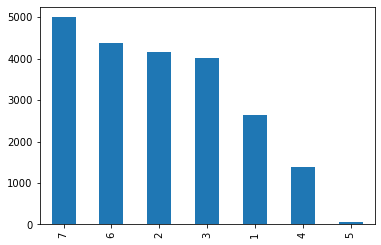

In [9]:
df['category'].value_counts().plot(kind='bar')

#### 카테고리 2, 3, 6, 7만 가져와서 df_new만들기

In [10]:
category_select=(df['category']==2)|(df['category']==3)|(df['category']==6)|(df['category']==7)

df_new=df.loc[category_select]
df_new.reset_index(drop=True,inplace=True)
df_new

,title,body,category
0,한국인 평균 연령 지난해 42.1세…10년새 다섯 살 늙어,"14일 행정안전부가 발표한 지난해 주민등록 인구 통계에 따르면, 통계 공표를 시작...",3
1,설 맞아 고속도로 휴게소 등 공중화장실 불법카메라 점검,행정안전부는 설 연휴 기간 이용객이 늘어날 공중화장실의 안전 점검에 나선다고 20...,3
2,'유혈분쟁' 북아일랜드서 차량 폭탄…브렉시트 국면 긴장고조,영국령 북아일랜드의 한 법원 앞에서 차량에 설치된 폭탄이 터졌다. 사상자는 없었지...,6
3,[연합시론] 국민연금 주주권 행사 판단 중심은 '장기 수익성'이다,보건복지부가 최근 국민연기금 운용 관련 최고의결기구인 기금운용위원회에 보고한 '국...,2
4,달리는 119구급차서 출산…대원들이 산파 역할,제주에서 출산이 임박한 임신부가 119구급차로 병원으로 옮겨지던 중 구급대원들의 ...,7
...,...,...,...
17566,"""힐러리, 대권 재도전 가능성에 '문닫지 않았다'""",2016년 대선 당시 도널드 트럼프 현 미국 대통령과의 대결에서 패배한 힐러리 클...,6
17567,"대구선관위, 민원인에 이웃돕기 성금 건넨 달서구청 조사",대구시 선거관리위원회는 손해 배상을 요구하는 민원인에게 이웃돕기 성금을 건넨 대구...,7
17568,인천시내 도로 달리던 차량 가로수 돌진…운전자 숨져,28일 낮 12시 3분께 인천시 미추홀구 한 왕복 6차로 인근 인도에 심어진 가로...,7
17569,군의원 폭행·추태로 농산물 판매 부진…예천군 출향인에 호소문,예천군의원 전원사퇴추진위원회가 11일 오전 경북 예천군의회 앞에서 &apos;가이...,7


In [11]:
df_new['category'].value_counts()

7    4998
6    4383
2    4162
3    4028
Name: category, dtype: int64

In [12]:
re.split("\. ",df_new['body'][0])

[' 14일 행정안전부가 발표한 지난해 주민등록 인구 통계에 따르면, 통계 공표를 시작한 2008년 이후 처음으로 인구 증가율이 0.1% 이하를 기록했다',
 ' 2008년 이후 10년 사이 한국 인구는 220만명 늘고 평균 나이는 다섯 살 이상 늙어 40세를 넘어선 것으로 나타났다',
 '또 여성 인구가 남성보다 갈수록 많아지고 있어 성비가 조만간 1 아래로 떨어질 전망이다',
 '20일 행정안전부의 주민등록 인구 통계를 분석한 결과다',
 '주민등록 인구 통계는 2007년까지 통계청이 전체 인구와 세대 수 등을 집계해 공표하다가 2008년부터 행안부가 한 살 단위 인구수 등 더 세분화하고 구체적인 내용을 담아 발표하기 시작했다',
 '2008년 통계와 최근 공표된 2018년 통계를 비교하면 총인구는 4천954만367명에서 5천182만6천59명으로 228만5천692명 늘어났다',
 '세대당 인구는 2008년 2.61명에서 지난해 2.35명으로 줄었다',
 '600만여 세대였던 1인 세대가 2018년 800만 세대를 넘어섰고 4인 이상 세대는 82만 세대 감소했다',
 '총인구의 평균 연령은 10년 새 37세에서 42.1세로 5.1세 올랐다',
 '남자는 35.9세에서 40.9세, 여자는 38.2세에서 43.2세로 바뀌었다',
 '30대 이하는 408만9천386명 감소했다',
 '10대 구간 인구가 169만3천769명 줄어 감소 폭이 가장 컸다',
 '60대 이상은 30대 이하 감소분과 거의 비슷하게 408만3천28명 증가했다',
 '40대를 기준으로 보면 40대 이하가 427만2천647명 감소했지만, 40대 초과는 655만8천339명 늘어나 총인구 증가를 50대 이상 연령층이 견인한 것으로 분석됐다',
 '성별로는 2008년과 비교해 2018년 남자가 104만3천232명 늘어난 2천586만6천129명, 여자는 124만2천460명 증가한 2천595만9천930명을 기록했다',
 "남녀 인구는 줄곧 남자가 많다가 2015년 1만2천966명 차이로 여자가 더 많아진

In [13]:
df_new['sentence_cnt']= 0

for i in range(len(df_new)):
    list=re.split("\. ",df_new['body'][i])
    list=[item for item in list if item !='']
    list=[item for item in list if item !=' ']
    df_new['sentence_cnt'][i]=len(list)
    
df_new

,title,body,category,sentence_cnt
0,한국인 평균 연령 지난해 42.1세…10년새 다섯 살 늙어,"14일 행정안전부가 발표한 지난해 주민등록 인구 통계에 따르면, 통계 공표를 시작...",3,21
1,설 맞아 고속도로 휴게소 등 공중화장실 불법카메라 점검,행정안전부는 설 연휴 기간 이용객이 늘어날 공중화장실의 안전 점검에 나선다고 20...,3,4
2,'유혈분쟁' 북아일랜드서 차량 폭탄…브렉시트 국면 긴장고조,영국령 북아일랜드의 한 법원 앞에서 차량에 설치된 폭탄이 터졌다. 사상자는 없었지...,6,18
3,[연합시론] 국민연금 주주권 행사 판단 중심은 '장기 수익성'이다,보건복지부가 최근 국민연기금 운용 관련 최고의결기구인 기금운용위원회에 보고한 '국...,2,13
4,달리는 119구급차서 출산…대원들이 산파 역할,제주에서 출산이 임박한 임신부가 119구급차로 병원으로 옮겨지던 중 구급대원들의 ...,7,5
...,...,...,...,...
17566,"""힐러리, 대권 재도전 가능성에 '문닫지 않았다'""",2016년 대선 당시 도널드 트럼프 현 미국 대통령과의 대결에서 패배한 힐러리 클...,6,9
17567,"대구선관위, 민원인에 이웃돕기 성금 건넨 달서구청 조사",대구시 선거관리위원회는 손해 배상을 요구하는 민원인에게 이웃돕기 성금을 건넨 대구...,7,6
17568,인천시내 도로 달리던 차량 가로수 돌진…운전자 숨져,28일 낮 12시 3분께 인천시 미추홀구 한 왕복 6차로 인근 인도에 심어진 가로...,7,5
17569,군의원 폭행·추태로 농산물 판매 부진…예천군 출향인에 호소문,예천군의원 전원사퇴추진위원회가 11일 오전 경북 예천군의회 앞에서 &apos;가이...,7,22


### 너무 많은 문장으로 이루어진 뉴스가 있음.

In [14]:
df_new['sentence_cnt'].value_counts()

7      1284
8      1271
6      1269
9      1152
5      1057
       ... 
118       1
56        1
87        1
63        1
95        1
Name: sentence_cnt, Length: 86, dtype: int64

##### 확인해보니까 인터뷰형식의 기사들인듯..(일문일답 등) -> 어떻게 처리하지..빼야하나

In [15]:
df_new[df_new['sentence_cnt']==118]

,title,body,category,sentence_cnt
8903,"[일문일답] 김현미 장관 ""공시가격 인상, 서민 부담 최소화할 것""",김현미 국토교통부 장관이 지난달 31일 오후 서울 용산구 LS타워에 마련된 장관실...,2,118


In [16]:
re.split("\. ",df_new['body'][8903])

[' 김현미 국토교통부 장관이 지난달 31일 오후 서울 용산구 LS타워에 마련된 장관실에서 연합뉴스와 인터뷰를 하고 있다',
 '2019.1.1  김현미 국토교통부 장관이 지난달 31일 오후 서울 용산구 LS타워에 마련된 장관실에서 연합뉴스와 인터뷰를 하고 있다',
 '2019.1.1  3선 국회의원인 김현미 국토교통부 장관은 관료들 사이에 인기가 높다',
 "지난해 말로 취임 1년6개월을 넘긴 그는 정치인 시절에 비쳤던 강인한 이미지를 벗고 남성 공무원들에게는 '부드러운 카리스마'로",
 "여성 공무원들에게는 '언니 리더쉽'으로 다가가 관료들 마음을 사로잡았다",
 '김 장관의 인기비결은 업무 해결 능력이다',
 '실무자들이 타 부처와의 협의나 국회 설득에 어려움을 겪을 때마다 3선 정치인의 관록으로 앞장서 해결해준다',
 "역대급 강도의 부동산 대책으로 꼽히는 '8·2대책', '9·13대책' 등의 밑그림도 모두 그의 손을 거쳐 나왔다",
 '김 장관은 지난달 31일 진행된 연합뉴스와의 신년 인터뷰에서 "지난 한 해를 돌아봤을 때 잘했다고 생각되는 일은 첨예한 이해관계가 얽힌 사안에 대해 대화로 접근해 해결책을 모색하려 노력했던 점"을 들었다',
 '버스 근로시간 단축과 화물차 표준운임제 도입, 건설산업 혁신뿐만 아니라 철도 안전 개선 등 여러 사안들을 노사정 회의 등 대화를 통해 문제를 풀었다는 것이다',
 '작년 BMW 엔진 화재와 열차 사고 등 유독 잦은 안전사고를 겪은 김 장관은 항상 잠들 때 휴대전화를 머리맡에 둔 채 선잠을 자고, 잠에서 깰 때마다 뉴스 검색을 하며 보냈다고 한다',
 '김 장관은 "특히 지난 여름은 부동산은 뛰고, BMW는 불타고, 비행기는 오지 않는 상황이 겹치면서 최악의 시간을 보냈다',
 '다음번 국토부 장관은 간과 심장이 튼튼한 분이 오셔야 할 것"이라며 웃어 보였다',
 '다음은 김 장관과의 일문일답',
 '-- 취임후 1년 반 동안 언론과의 정식 인터뷰는 이번이 처음이다',
 '국토부에 많은 일이 있었는데 소감은',
 

#### 뉴스 문장 개수의 평균은 11~12개 정도..

In [17]:
df_new['sentence_cnt'].mean()

11.606339992032327

### 문장 개수 범위를 어떻게 정할지 고민..

#### 우선 문장개수 4개이하는 의미 없는 기사, 간단한 정보 전달들이라서 제외

In [18]:
df_new[df_new['sentence_cnt']<=4]

,title,body,category,sentence_cnt
1,설 맞아 고속도로 휴게소 등 공중화장실 불법카메라 점검,행정안전부는 설 연휴 기간 이용객이 늘어날 공중화장실의 안전 점검에 나선다고 20...,3,4
13,"[게시판] 한은 화폐박물관, '한국의 화폐' 도록 발간",▲ 한국은행 화폐박물관은 '한국의 화폐' 도록을 발간했다고 20일 밝혔다. 이 도...,2,4
26,"[동정] 윤종인 행안부 차관, 세종시 주민자치회 방문",▲ 윤종인 행정안전부 차관은 오는 21일 세종시 부강면 주민자치회를 방문해 주민...,3,2
27,내장산국립공원백암사무소장에 서인교 소장 부임,국립공원공단 내장산국립공원백암사무소는 오는 21일 서인교 신임 소장이 부임한다고 ...,7,3
39,[부고] 김상만(대구신문 경북본부장)씨 장모상,"▲ 김옥수씨 별세, 김상만(대구신문 경북본부장)씨 장모상 20일 오전 9시 50분...",7,1
...,...,...,...,...
17551,[그래픽] 2019 경제자유지수 순위,28일 미국 워싱턴의 보수 싱크탱크인 헤리티지 재단이 펴낸 '2019년 경제자유지...,2,1
17552,동아타이어 작년 영업익 124억원…769.7% 증가,코스피 상장사 동아타이어[007340]는 개별기준 지난해 영업이익이 124억원으로...,2,2
17555,"보령제약, 작년 영업익 253억원…96% 증가",보령제약[003850]은 지난해 연결기준 영업이익이 전년보다 96.0% 증가한 2...,2,3
17557,달력 나눠준 전 민주당 창녕군수 후보 벌금 90만원 선고,창원지법 밀양지원 형사1부(심현욱 지원장)는 지난해 6·13 지방선거를 앞두고 선...,7,3


In [19]:
re.split("\. ",df_new['body'][49])

[' ▲ 행정안전부는 행정협의조정위원회 제10기 민간위원 4명의 위촉장 수여식을 21일 정부서울청사에서 개최한다',
 '백윤기 아주대 법학전문대학원 교수가 위원장을 맡고 안성민 울산대 행정학과 교수, 조성규 전북대 법학전문대학원 교수, 차미숙 국토연구원 국토계획·지역연구본부장이 위원으로 위촉돼 2021년 1월 1일까지 활동한다',
 '행정협의조정위원회는 중앙행정기관과 지방자치단체의 의견이 다를 때 이를 협의·조정하기 위한 국무총리 소속 위원회다.(서울=연합뉴스)']

#### 5개부터는 어느 정도 뉴스의 형태를 갖췄다고 보임

In [20]:
df_new[df_new['sentence_cnt']>=5]

,title,body,category,sentence_cnt
0,한국인 평균 연령 지난해 42.1세…10년새 다섯 살 늙어,"14일 행정안전부가 발표한 지난해 주민등록 인구 통계에 따르면, 통계 공표를 시작...",3,21
2,'유혈분쟁' 북아일랜드서 차량 폭탄…브렉시트 국면 긴장고조,영국령 북아일랜드의 한 법원 앞에서 차량에 설치된 폭탄이 터졌다. 사상자는 없었지...,6,18
3,[연합시론] 국민연금 주주권 행사 판단 중심은 '장기 수익성'이다,보건복지부가 최근 국민연기금 운용 관련 최고의결기구인 기금운용위원회에 보고한 '국...,2,13
4,달리는 119구급차서 출산…대원들이 산파 역할,제주에서 출산이 임박한 임신부가 119구급차로 병원으로 옮겨지던 중 구급대원들의 ...,7,5
5,"""여자는 쭉쭉빵빵해야""…'스쿨미투' 서울 중학교 교사 검찰 송치",지난해 '스쿨미투' 폭로로 학생을 성희롱했다는 의혹이 불거진 서울 광진구의 한 공...,3,8
...,...,...,...,...
17566,"""힐러리, 대권 재도전 가능성에 '문닫지 않았다'""",2016년 대선 당시 도널드 트럼프 현 미국 대통령과의 대결에서 패배한 힐러리 클...,6,9
17567,"대구선관위, 민원인에 이웃돕기 성금 건넨 달서구청 조사",대구시 선거관리위원회는 손해 배상을 요구하는 민원인에게 이웃돕기 성금을 건넨 대구...,7,6
17568,인천시내 도로 달리던 차량 가로수 돌진…운전자 숨져,28일 낮 12시 3분께 인천시 미추홀구 한 왕복 6차로 인근 인도에 심어진 가로...,7,5
17569,군의원 폭행·추태로 농산물 판매 부진…예천군 출향인에 호소문,예천군의원 전원사퇴추진위원회가 11일 오전 경북 예천군의회 앞에서 &apos;가이...,7,22


In [21]:
list=re.split("\.\s",df_new['body'][17531])
list=[item for item in list if item !='']
list

[' 경남 창원시 산하기관인 창원산업진흥원 2대 원장에 백정한(54) 전 핸디소프트 클라우드 사업부 전무가 28일 취임했다',
 '백 신임 원장은 "기계산업 중심지인 창원시가 스마트 제조혁신으로 옛 영광을 회복하고 4차 산업시대를 선도하는 도시가 되도록 최선을 다하겠다"고 말했다',
 '창원산업진흥원은 창원시가 설립한 비영리재단법인이다',
 '지역 산업 장기발전전략 수립, 기업 서비스, 해외시장 개척·수출 지원업무 등을 한다',
 '백 신임 원장은 서울대 계산통계학과 출신으로 한양대 정보시스템학과 겸임교수, 한국IBM 상무 등을 거쳤다']

#### 문장수가 29개 이상은 각각 기사의 개수가 100개도 안되기 때문에 제외

In [23]:
cnt=pd.DataFrame(df_new['sentence_cnt'].value_counts())
cnt.reset_index(inplace=True)
cnt.sort_values(by='index').head(30)

,index,sentence_cnt
23,0,159
15,1,481
12,2,609
11,3,625
9,4,762
4,5,1057
2,6,1269
0,7,1284
1,8,1271
3,9,1152


In [24]:
df_new[df_new['sentence_cnt']==28]

,title,body,category,sentence_cnt
41,"유럽경제 '먹구름'…글로벌IB, 성장 전망 속속 낮춰","최근 유럽 각국의 경기가 좀체 살아나지 않는 데다 브렉시트(영국의 EU 탈퇴), ...",6,28
147,"박병대, 대법관 때 고교후배 사건 '셀프 배당' 의혹(종합)",사법행정권 남용 사건에 관여한 의혹을 받는 박병대 전 대법관이 6일 오후 서울 서...,3,28
342,'바람 불어도 괜찮아요'…추위 잊은 겨울 축제에 인파 북적,2019 화천산천어축제 개막일인 5일 오후 강원 화천군 화천천 축제장 일원이 얼음...,7,28
644,"마크롱 '대토론' 승부수로 반등세…""대선 때 정신 돌아왔다""",에마뉘엘 마크롱 프랑스 대통령이 집권 후 최대위기로 평가된 '노란 조끼' 집회 ...,6,28
932,"[PRNewswire] 스포츠 의류 브랜드 Champion(R), 글로벌 캠페인 개시","-- ""팀을 위해 달려온 100년""을 기념 -- 스포츠계의 전설인 매직 존슨과 손...",6,28
...,...,...,...,...
16635,2㎞ 얼음 벌판에 몰려든 인파…화천산천어축제 주말열기 '절정',2019 화천산천어축제가 개막한 지 두번째 주말을 맞은 12일 강원 화천군 화천천...,7,28
16740,"건양대 ""캄보디아 귀국 학생들 건강 양호…1명은 미열""(종합)",건양대 대학생 2명이 캄보디아 봉사활동 중 복통을 호소하다 숨진 가운데 남은 학생...,7,28
16816,내일 수도권 올해 첫 미세먼지 비상저감조치…화력발전 제한(종합2보),고농도 미세먼지가 나타나면서 13일 수도권에 올해 첫 미세먼지 비상저감조치가 시...,3,28
17413,볼턴 목소리 키우고 에이브럼스 특사에…美'네오콘' 입지 커진다,베네수엘라 사태를 계기로 강경 대외노선을 강조하는 미국 신보수주의자들을 일컫는 '...,6,28


In [27]:
list=re.split("\.\s",df_new['body'][17469])
list=[item for item in list if (item !='')]
list=[item for item in list if (item !=' ')]
list

[' 교육 당국이 체육계 성폭력·폭력을 근절하기 위해 전국의 모든 학교운동부에 특별점검을 시행한다',
 "교육부는 28일 오전 정부세종청사에서 유은혜 부총리 겸 교육부 장관 주재로 '교육신뢰회복추진단' 2차 회의를 연 뒤 이같이 밝혔다",
 '교육부는 각 시·도 교육청이 모든 학교운동부에 대해 2월 말까지 특별점검을 벌이도록 했다',
 '운동부 운영과 합숙훈련 전반에 대해 조사가 이뤄지며, 필요에 따라 동계 전지훈련 현장 방문조사도 벌인다',
 '이는 교육부·국가인권위·문화체육관광부·여성가족부 등이 함께 학생 선수 6만3천여명을 전수조사하는 것과는 별개다',
 '현행지침에 따라 학교운동부 지도자에게 인권 및 성폭력·폭력 예방 교육이 연 1∼2회 시행되고 있는지, 학생 선수에 대한 학교폭력 예방 교육 연 2회와 상담 활동 월 1회가 시행되고 있는지 들여다본다',
 '학부모 부담금이 학교회계로 문제없이 편입되는지, 학생 선수에 대한 인권·학습권 침해는 없는지 등도 점검 대상이다',
 '특히 학생 선수와 학교운동부 지도자의 성별이 다른 경우에 학생 선수들을 대상으로 심층 면담이 진행된다',
 '학교운동부 지도자 전원에게는 학기 시작 전까지 성폭력·폭력 예방 교육을 완료한다',
 '아울러 교육부는 문화체육관광부 등과 협력해 학교운동부 지도자 등록 및 자격 관리 시스템을 구축한다',
 '비리가 밝혀진 학교운동부 지도자에 대해서는 기존에 학교나 시·도가 경기단체에 징계를 요구했던 것을 상급기관인 대한체육회에 요구하도록 변경하고, 징계 이력은 교육부와 문체부가 공유하기로 했다',
 '비위가 밝혀진 지도자를 학교 차원에서 자체조사해 사표만 받는 경우가 많다는 지적이 잇따른 만큼, 비리 신고를 의무화하고 징계 이력을 체계적으로 관리해 비리 지도자 재취업을 엄격히 관리하기로 했다',
 "'성적 지상주의'와 과도한 경쟁·훈련을 유발한다는 지적이 있었던 전국체육대회·전국소년체육대회도 개선한다",
 '전국체육대회의 고등부를 분리해 전국소년체육대회로 통합하고, 전국소년체육대회는 대회가

## 그래서 문장 개수는 5개 이상 28개 이하로 최종 결정

In [31]:
df_clear=df_new[(df_new['sentence_cnt']<=28)&(df_new['sentence_cnt']>=5)]
df_clear

,title,body,category,sentence_cnt
0,한국인 평균 연령 지난해 42.1세…10년새 다섯 살 늙어,"14일 행정안전부가 발표한 지난해 주민등록 인구 통계에 따르면, 통계 공표를 시작...",3,21
2,'유혈분쟁' 북아일랜드서 차량 폭탄…브렉시트 국면 긴장고조,영국령 북아일랜드의 한 법원 앞에서 차량에 설치된 폭탄이 터졌다. 사상자는 없었지...,6,18
3,[연합시론] 국민연금 주주권 행사 판단 중심은 '장기 수익성'이다,보건복지부가 최근 국민연기금 운용 관련 최고의결기구인 기금운용위원회에 보고한 '국...,2,13
4,달리는 119구급차서 출산…대원들이 산파 역할,제주에서 출산이 임박한 임신부가 119구급차로 병원으로 옮겨지던 중 구급대원들의 ...,7,5
5,"""여자는 쭉쭉빵빵해야""…'스쿨미투' 서울 중학교 교사 검찰 송치",지난해 '스쿨미투' 폭로로 학생을 성희롱했다는 의혹이 불거진 서울 광진구의 한 공...,3,8
...,...,...,...,...
17566,"""힐러리, 대권 재도전 가능성에 '문닫지 않았다'""",2016년 대선 당시 도널드 트럼프 현 미국 대통령과의 대결에서 패배한 힐러리 클...,6,9
17567,"대구선관위, 민원인에 이웃돕기 성금 건넨 달서구청 조사",대구시 선거관리위원회는 손해 배상을 요구하는 민원인에게 이웃돕기 성금을 건넨 대구...,7,6
17568,인천시내 도로 달리던 차량 가로수 돌진…운전자 숨져,28일 낮 12시 3분께 인천시 미추홀구 한 왕복 6차로 인근 인도에 심어진 가로...,7,5
17569,군의원 폭행·추태로 농산물 판매 부진…예천군 출향인에 호소문,예천군의원 전원사퇴추진위원회가 11일 오전 경북 예천군의회 앞에서 &apos;가이...,7,22


In [33]:
df_clear['category'].value_counts()

7    4239
6    3918
3    3167
2    2800
Name: category, dtype: int64

### 토큰화

In [29]:
from konlpy.tag import Okt
okt=Okt()

In [32]:
print(okt.morphs(df_clear['body'][0]))

['14일', '행정안전부', '가', '발표', '한', '지난해', '주민등록', '인구', '통계', '에', '따르면', ',', '통계', '공표', '를', '시작', '한', '2008년', '이후', '처음', '으로', '인구', '증가', '율', '이', '0.1%', '이하', '를', '기록', '했다', '.', '2008년', '이후', '10년', '사이', '한국', '인구', '는', '220만', '명', '늘', '고', '평균', '나이', '는', '다섯', '살', '이상', '늙어', '40', '세', '를', '넘어선', '것', '으로', '나타났다', '.', '또', '여성', '인구', '가', '남성', '보다', '갈수록', '많아지고', '있어', '성비', '가', '조만간', '1', '아래', '로', '떨어질', '전망', '이다', '.', '20일', '행정안전부', '의', '주민등록', '인구', '통계', '를', '분석', '한', '결과', '다', '.', '주민등록', '인구', '통계', '는', '2007년', '까지', '통계청', '이', '전체', '인구', '와', '세대', '수', '등', '을', '집계', '해', '공표', '하다가', '2008년', '부터', '행안부', '가', '한', '살', '단위', '인구', '수', '등', '더', '세분', '화', '하고', '구체', '적', '인', '내용', '을', '담아', '발표', '하기', '시작', '했다', '.', '2008년', '통계', '와', '최근', '공표', '된', '2018년', '통계', '를', '비교', '하면', '총', '인구', '는', '4천', '954만', '367', '명', '에서', '5천', '182만', '6천', '59', '명', '으로', '228만', '5천', '692', '명', '늘어났다', '.', '세대', '당', '인구', '는